<a href="https://colab.research.google.com/github/dacardonave/Modelado-y-Simulacion/blob/master/Crecimiento_Poblacional_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Daniel Cardona Velasquez
### Universidad Nacional De Colombia
### Modelado y Simulacion

Comenzaremos este cuaderno hablando sobre el metodo de integracion de euler, que no es mas que un metodo que nos permite conocer la pendiente a la recta tangente de una curva en un respectivo punto. La idea principal con este metodo es hallar los puntos de equilibrio o ceros de una funcion y ver como se comportan los flujos con respecto a estos puntos. 

A continuacion importamos algunas librerias que usaremos en el desarrollo de este cuaderno y en la implementacion de metodo de Euler. Pueden buscar informacion adicional de cualquiera de estas librerias en internet.

In [0]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Método de Euler
Es un método iterativo que a partir de un valor inicial emplea la derivada para conocer la pendiente de la recta tangente en ese punto, para luego trazar una recta hasta el siguente valor con un incremento h.

𝑥𝑖+1=𝑥𝑖+ℎ𝑓(𝑡𝑖,𝑥𝑖)

Este es el metodo de integracion que vamos a hacer para la visualizacion de los flujos

In [0]:
# Creacion de la funcion (Metodo de euler)
def euler( f, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*f(ti,xi,params)
      ti = ti + h
    return t, x  

En el apartado anterior es importante reslatar que euler es nuestro metodo de integracion y va a recibir por parametros lo siguiente:
* f ----> Va a ser nuestra funcion a evaluar
* h ----> Va a ser el paso de integracion a utilizar por el metodo
* tini ---> Tiempo inicial 
* tifin --> Tiempo Final
* X0 -----> Valores Iniciales
* params ---> Parametros adicionales (si la funcion los requiere)

## A continuacion haremos dos ejemplos ilustrativos de lo que se quiere lograr antes de implementar el problema de crecimiento poblacional

## 1. Lineal 𝑥˙=𝑎𝑥
Dada la ecuación diferencial:

𝑥˙=𝑎𝑥 

Siendo  𝑎∈ℜ  una constante cualquiera.

Graficamos la solución analítica y las aproximaciones numéricas obtenidas con el método de Euler.

Varíando el paso de integración  ℎ  se puede observar como varia la precision de los resultados numericos a medida que este se hace mas puequeño.

In [0]:
def sistema_1(t, x, a):
    x_dot = a*x
    return x_dot

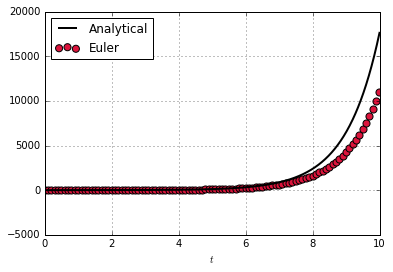

In [0]:
a = 1
h = 0.1
tini = 0
tfin = 10
x0 = 0.8

#Grafica de la solucion exacta
t = np.linspace(0,10,1001) # h = 0.1
x = x0*np.exp(a*t)

#Grafica del metodo de Euler
t1,x1 = euler( sistema_1, h, tini, tfin, x0, a )



#Generando las graficas 
plt.figure()

#gráfica de analítica:
plt.plot(  t, x, 'black', label = 'Analytical', linewidth = 2)

# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)

plt.xlim([0, tfin])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()



## 2. No Lineal  𝑥˙= sin(x)

Dada la ecuacion 𝑥˙= sin(x)

Graficamos la solucion analitica y las aproximaciones numericas obtenidas utilizando el metodo de euler.

In [0]:
def sistema2(t, x, a):
    x_dot = a*np.sin(x)
    return x_dot

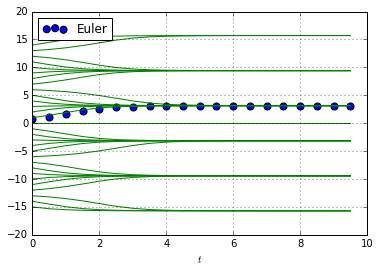

In [0]:
a = 1
h = 0.5
tini = 0
tfin = 10
x0 = 0.8

t1,x1 = euler( sistema2, h, tini, tfin, x0, a )

plt.figure()
plt.scatter( t1, x1, c = 'b', label = 'Euler', s = 50)

for i in range(-15,15,1):
    x0=i
    t1,x1 = euler( sistema2, h, tini, tfin, x0, a )
    plt.plot( t1, x1, c = 'g', )

plt.xlim([0, tfin])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()


## Luego de estos dos ejemplos, planteamos el problema de crecimiento poblacional

## 3. Crecimiento de la población 

El modelo mas simple para describir el crecimiento de una poblacion de organismos es descrito por la ecuación diferencial: 

 $$N˙=rN$$
    
Donde N(t) es la poblacion en el tiempo t, y r>0 es la tasa de crecimiento.

Este modelo predice un crecimiento poblacional que por supuesto no puede continuar para siempre. Para modelar lso efectos del exceso hacinamiento y recursos limitados, los biologos a menudo asumen la tasas de crecimiento per capita N˙/N como se muestra a continuacion.

![image.png](attachment:image.png)

Sin embargo, para poblaciones mas grandes que cierta capacidad de carga K, la tasa de crecimiento en realidad se vuelve negativa; la tasa de mortalidad es mayor que la tasa de natalidad.
Una manera matematicamente conveniente de incorporar esta idea es asumir que el rango de crecimiento per capita decrese linealmente con N.



Esto nos lleva a la ecuacion Logistica

 $$N˙=rN(1-(N/K))$$

 

In [0]:
def sistema_3( t, N, params):
    
    r, k = params

    N_dot = r*N*(1-(N/k))
    
    return N_dot

Ahora podemos mostrar con la ayuda del metodo de integracion de euler, las aproximacion numericas obtenidas 

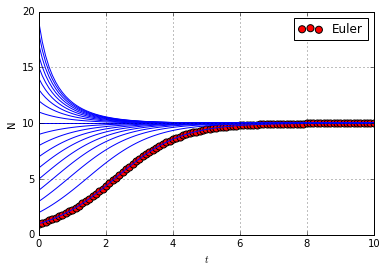

In [0]:
r = 1
k = 10
h= 0.1
tini = 0
tfin = 10
x0 = 1

t2,x2 = euler( sistema_3, h, tini, tfin, x0, [r,k] )

plt.figure()
plt.scatter( t2, x2, c = 'r', label = 'Euler', s = 50)

for i in range(1,20,1):
    x0=i
    t2,x2 = euler( sistema_3, h, tini, tfin, x0, [r,k] )
    plt.plot( t2, x2, c = 'b')

plt.ylabel('N')
plt.xlim([0, tfin])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc='best')
plt.show()